# Visualising High‑Dimensional Data – PCA, t‑SNE, and UMAP

This notebook demonstrates three popular **dimensionality‑reduction** techniques on the *same* digits dataset and explains how to interpret the resulting 2‑D “clusters.”

## 1  Why Dimensionality Reduction?
* Turn complex, high‑D feature spaces into 2‑D or 3‑D for human inspection.
* Reveal hidden structure: groups, outliers, class separability.
* Feed reduced features into downstream algorithms to speed up training.

> **Note:** The cell below installs **UMAP** if it’s not already present. It’s lightweight and CPU‑friendly.

In [1]:
import importlib, subprocess, sys, textwrap, warnings
try:
    import umap
except ModuleNotFoundError:
    print("Installing umap-learn...")
    subprocess.check_call([sys.executable, "-m", "pip", "install", "-q", "umap-learn"])

## 2  Load the Digits Dataset

In [2]:
from sklearn.datasets import load_digits
import numpy as np
import matplotlib.pyplot as plt

digits = load_digits()
X, y = digits.data, digits.target
print("Input shape:", X.shape)

Input shape: (1797, 64)


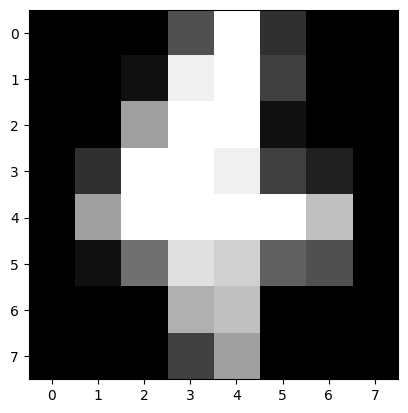

In [22]:
plt.imshow(digits.data[250,:].reshape(8,8), cmap='grey')

### 2.1  Scale the Data
Distance‑based methods (especially t‑SNE, UMAP) benefit from zero‑mean, unit‑variance features. We’ll keep a copy of the scaled data to reuse for all three algorithms.

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## 3  Principal Component Analysis (PCA)
* **Linear** technique – finds orthogonal directions of maximum variance.
* Good for capturing *global* structure but may miss complex manifolds.

In [25]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)
print("Explained variance ratio:", pca.explained_variance_ratio_.sum().round(3))

Explained variance ratio: 0.216


/Users/amircharkhi/.pyenv/versions/3.13.1/lib/python3.13/site-packages/sklearn/decomposition/_pca.py:604: RuntimeWarning: divide by zero encountered in matmul
  C = X.T @ X
/Users/amircharkhi/.pyenv/versions/3.13.1/lib/python3.13/site-packages/sklearn/decomposition/_pca.py:604: RuntimeWarning: overflow encountered in matmul
  C = X.T @ X
/Users/amircharkhi/.pyenv/versions/3.13.1/lib/python3.13/site-packages/sklearn/decomposition/_pca.py:604: RuntimeWarning: invalid value encountered in matmul
  C = X.T @ X
/Users/amircharkhi/.pyenv/versions/3.13.1/lib/python3.13/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: divide by zero encountered in matmul
  X_transformed = X @ self.components_.T
/Users/amircharkhi/.pyenv/versions/3.13.1/lib/python3.13/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: overflow encountered in matmul
  X_transformed = X @ self.components_.T
/Users/amircharkhi/.pyenv/versions/3.13.1/lib/python3.13/site-packages/sklearn/decomposition

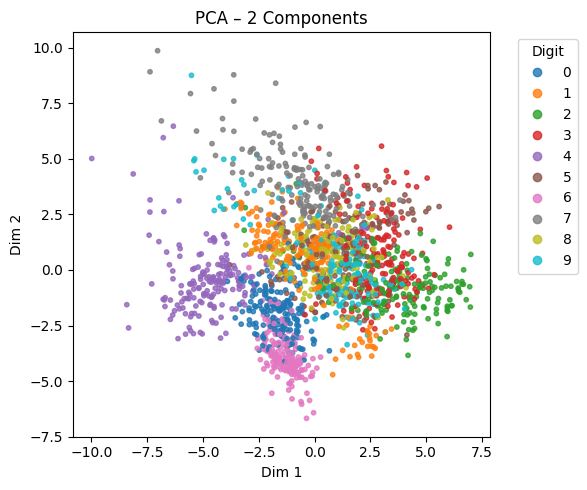

In [26]:
def plot_2d(x2d, labels, title):
    plt.figure(figsize=(6,5))
    scatter = plt.scatter(x2d[:,0], x2d[:,1], c=labels, cmap='tab10', s=10, alpha=0.8)
    plt.legend(*scatter.legend_elements(num=10), title="Digit", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.title(title)
    plt.xlabel('Dim 1')
    plt.ylabel('Dim 2')
    plt.tight_layout()
    plt.show()

plot_2d(X_pca, y, "PCA – 2 Components")

## 4  t‑Distributed Stochastic Neighbour Embedding (t‑SNE)
* **Non‑linear**, focuses on preserving *local* neighbourhoods.
* Excellent for visualising clusters; not ideal for downstream ML features.
* Sensitive to parameters (`perplexity`, `learning_rate`).

/Users/amircharkhi/.pyenv/versions/3.13.1/lib/python3.13/site-packages/sklearn/utils/extmath.py:350: RuntimeWarning: divide by zero encountered in matmul
  Q, _ = normalizer(A @ Q)
/Users/amircharkhi/.pyenv/versions/3.13.1/lib/python3.13/site-packages/sklearn/utils/extmath.py:350: RuntimeWarning: overflow encountered in matmul
  Q, _ = normalizer(A @ Q)
/Users/amircharkhi/.pyenv/versions/3.13.1/lib/python3.13/site-packages/sklearn/utils/extmath.py:350: RuntimeWarning: invalid value encountered in matmul
  Q, _ = normalizer(A @ Q)
/Users/amircharkhi/.pyenv/versions/3.13.1/lib/python3.13/site-packages/sklearn/utils/extmath.py:351: RuntimeWarning: divide by zero encountered in matmul
  Q, _ = normalizer(A.T @ Q)
/Users/amircharkhi/.pyenv/versions/3.13.1/lib/python3.13/site-packages/sklearn/utils/extmath.py:351: RuntimeWarning: overflow encountered in matmul
  Q, _ = normalizer(A.T @ Q)
/Users/amircharkhi/.pyenv/versions/3.13.1/lib/python3.13/site-packages/sklearn/utils/extmath.py:351: Run

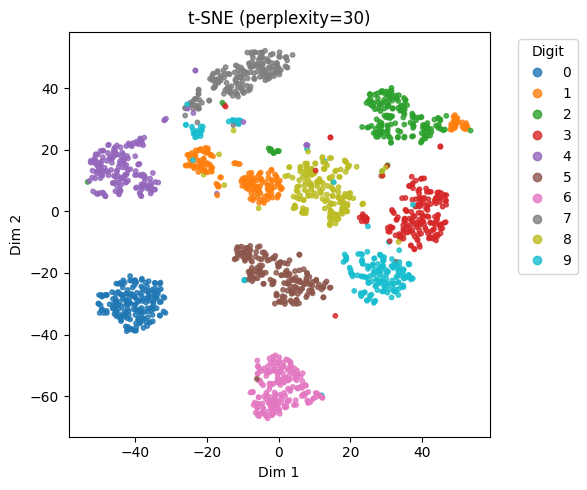

In [27]:
from sklearn.manifold import TSNE

tsne = TSNE(
    n_components=2,
    perplexity=30,
    learning_rate=200,
    random_state=42,
    init='pca'
)
X_tsne = tsne.fit_transform(X_scaled)
plot_2d(X_tsne, y, "t‑SNE (perplexity=30)")

## 5  Uniform Manifold Approximation and Projection (UMAP)
* **Non‑linear** like t‑SNE but faster and often preserves more *global* structure.
* Constructs a high‑D graph and optimises a low‑D layout.

/Users/amircharkhi/.pyenv/versions/3.13.1/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


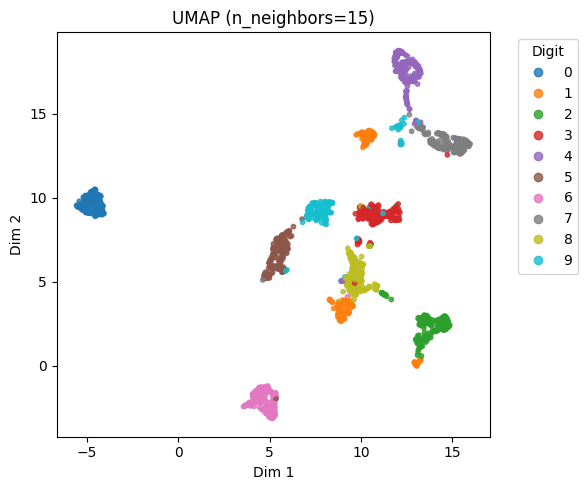

In [28]:
import umap

umap_model = umap.UMAP(
    n_neighbors=15,
    min_dist=0.1,
    n_components=2,
    metric='euclidean',
    random_state=42
)
X_umap = umap_model.fit_transform(X_scaled)
plot_2d(X_umap, y, "UMAP (n_neighbors=15)")

## 6  How to Interpret the Plots
| Observation | Meaning & caveats |
|-------------|------------------|
| **Tight, well‑separated clusters of the same colour** | Algorithm found features that strongly distinguish those digit classes. ‑> Good class separability. |
| **Overlap between colours** | Digits share pixel patterns (e.g., *4* vs *9*). Model may confuse them. |
| **PCA clusters elongated / linear** | PCA cares about **variance**, not class labels → digits arranged along variance directions. |
| **t‑SNE “islands”** | Focuses on **local** neighbour similarity; distance between islands is **not** always meaningful globally. |
| **UMAP mix of local + global** | Often shows a bigger‑picture layout (e.g., similar digits closer together) *and* tight local grouping. |

**Good practice:**
* Use colours only for ground‑truth labels → resist over‑interpreting axes.
* Combine with quantitative metrics (cluster purity, silhouette) if you need numeric validation.
* Beware of parameter choice; run t‑SNE/UMAP several times.

### 6.1  Optional: Silhouette Score
Below we treat class labels as *clusters* and compute silhouette scores to quantify separation.

In [29]:
from sklearn.metrics import silhouette_score

for name, emb in [('PCA', X_pca), ('t-SNE', X_tsne), ('UMAP', X_umap)]:
    score = silhouette_score(emb, y)
    print(f"{name} silhouette score: {score:.3f}")

PCA silhouette score: 0.055
t-SNE silhouette score: 0.499
UMAP silhouette score: 0.553


/Users/amircharkhi/.pyenv/versions/3.13.1/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/amircharkhi/.pyenv/versions/3.13.1/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/amircharkhi/.pyenv/versions/3.13.1/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/amircharkhi/.pyenv/versions/3.13.1/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/amircharkhi/.pyenv/versions/3.13.1/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/amircharkhi/.pyenv/versions/3.13.1/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users

## 7  Next Steps
* Experiment with **perplexity** (t‑SNE) and **n_neighbors / min_dist** (UMAP).
* Try **3‑D** embeddings and rotate interactively (use `mpl_toolkits.mplot3d`).
* Apply to a *practical* dataset: word embeddings, customer behaviour, gene expression.